# TTT4275 Classification Project: Music Genre Classification

Imports:

In [6]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import classification_report
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Task 1

## Task 2

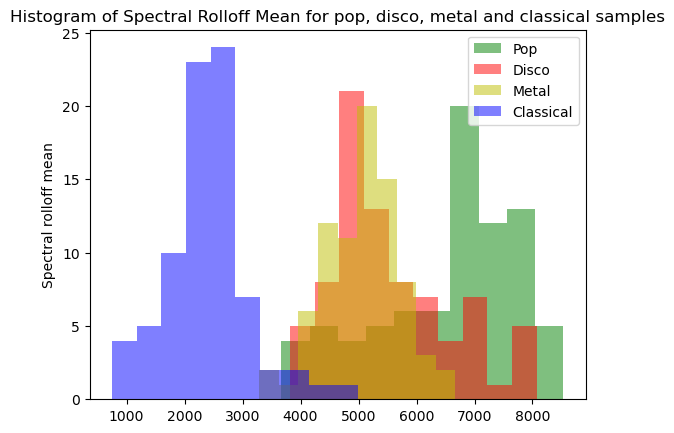

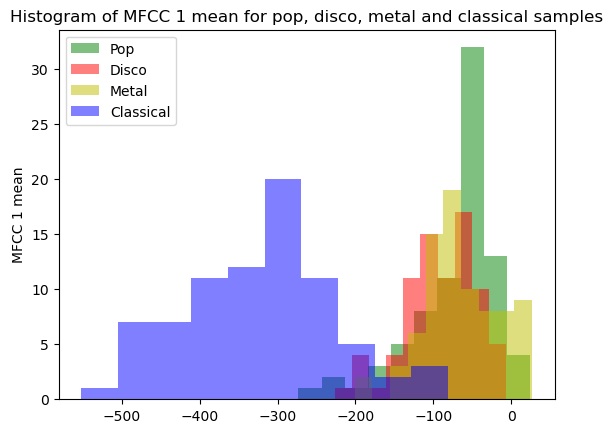

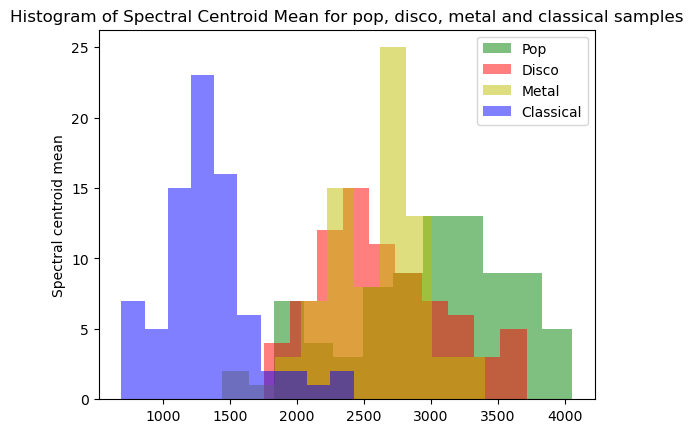

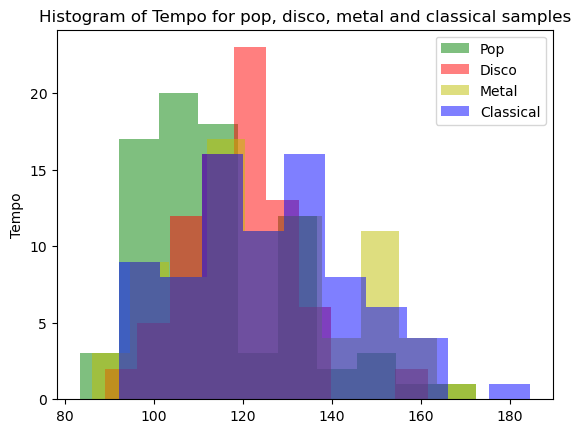

In [7]:
data_30 = pd.read_csv('Classification music/GenreClassData_30s.txt', sep="\t")

selected_features = data_30[['spectral_rolloff_mean', 'mfcc_1_mean', 'spectral_centroid_mean', 'tempo', 'Genre', 'Type']]

# Filter rows based on the 'Type' column
training_data = selected_features[selected_features['Type'] == 'Train']
test_data = selected_features[selected_features['Type'] == 'Test']


# Separate features into genres
features_pop = training_data[training_data['Genre'] == 'pop']
features_disco = training_data[training_data['Genre'] == 'disco']
features_metal = training_data[training_data['Genre'] == 'metal']
features_classical = training_data[training_data['Genre'] == 'classical']


# Plot histograms
kwargs = dict(alpha=0.5, bins=10)
plt.hist(features_pop['spectral_rolloff_mean'], **kwargs, color='g', label='Pop')
plt.hist(features_disco['spectral_rolloff_mean'], **kwargs, color='r', label='Disco')
plt.hist(features_metal['spectral_rolloff_mean'], **kwargs, color='y', label='Metal')
plt.hist(features_classical['spectral_rolloff_mean'], **kwargs, color='b', label='Classical')
plt.gca().set(title='Histogram of Spectral Rolloff Mean for pop, disco, metal and classical samples', ylabel='Spectral rolloff mean')
plt.legend()
plt.show()

kwargs = dict(alpha=0.5, bins=10)
plt.hist(features_pop['mfcc_1_mean'], **kwargs, color='g', label='Pop')
plt.hist(features_disco['mfcc_1_mean'], **kwargs, color='r', label='Disco')
plt.hist(features_metal['mfcc_1_mean'], **kwargs, color='y', label='Metal')
plt.hist(features_classical['mfcc_1_mean'], **kwargs, color='b', label='Classical')
plt.gca().set(title='Histogram of MFCC 1 mean for pop, disco, metal and classical samples', ylabel='MFCC 1 mean')
plt.legend()
plt.show()

kwargs = dict(alpha=0.5, bins=10)
plt.hist(features_pop['spectral_centroid_mean'], **kwargs, color='g', label='Pop')
plt.hist(features_disco['spectral_centroid_mean'], **kwargs, color='r', label='Disco')
plt.hist(features_metal['spectral_centroid_mean'], **kwargs, color='y', label='Metal')
plt.hist(features_classical['spectral_centroid_mean'], **kwargs, color='b', label='Classical')
plt.gca().set(title='Histogram of Spectral Centroid Mean for pop, disco, metal and classical samples', ylabel='Spectral centroid mean')
plt.legend()
plt.show()

kwargs = dict(alpha=0.5, bins=10)
plt.hist(features_pop['tempo'], **kwargs, color='g', label='Pop')
plt.hist(features_disco['tempo'], **kwargs, color='r', label='Disco')
plt.hist(features_metal['tempo'], **kwargs, color='y', label='Metal')
plt.hist(features_classical['tempo'], **kwargs, color='b', label='Classical')
plt.gca().set(title='Histogram of Tempo for pop, disco, metal and classical samples', ylabel='Tempo')
plt.legend()
plt.show()

## Task 3

## Task 4

Gaussian Mixture Model Classifier:

c:\Users\lmtop\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\lmtop\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\lmtop\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\lmtop\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

              precision    recall  f1-score   support

       blues       0.75      0.69      0.72       200
   classical       0.89      0.88      0.89       190
     country       0.51      0.60      0.55       190
       disco       0.48      0.51      0.50       200
      hiphop       0.77      0.83      0.80       200
        jazz       0.68      0.70      0.69       200
       metal       0.97      0.84      0.90       200
         pop       0.67      0.81      0.74       200
      reggae       0.76      0.48      0.59       200
        rock       0.44      0.47      0.45       200

    accuracy                           0.68      1980
   macro avg       0.69      0.68      0.68      1980
weighted avg       0.69      0.68      0.68      1980



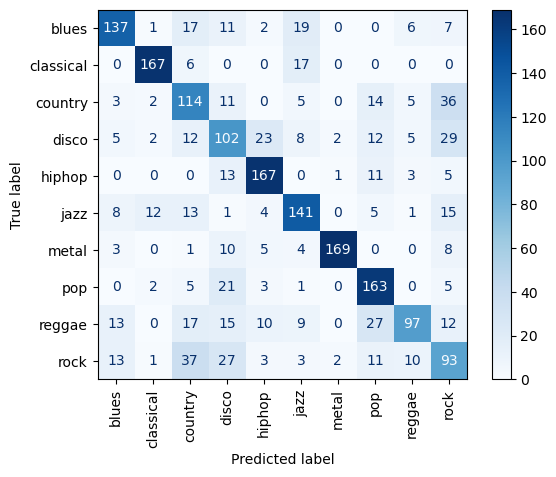

In [10]:
data_5s = pd.read_csv('Classification music/GenreClassData_5s.txt', sep='\t')
data_10s = pd.read_csv('Classification music/GenreClassData_10s.txt', sep='\t')
data_30s = pd.read_csv('Classification music/GenreClassData_30s.txt', sep='\t')

combined_data = pd.concat([data_5s,data_10s, data_30s], ignore_index=True)
# Filter rows based on the 'Type' column
selected_features = combined_data.drop('tempo', axis=1)

training_data = selected_features[selected_features['Type'] == 'Train']
test_data = selected_features[selected_features['Type'] == 'Test']

X_train = training_data.drop(['Genre', 'Type','Track ID', 'File','GenreID'], axis=1)
y_train = training_data['Genre']

X_test = test_data.drop(['Genre', 'Type','Track ID', 'File','GenreID'], axis=1)
y_test = test_data['Genre']

# Identify unique class labels
unique_classes = np.unique(y_train)

# Train a GMM for each class
gmms = {}
for cls in unique_classes:
    X_train_cls = X_train[y_train == cls]
    gmm = GaussianMixture(n_components=2, random_state=42)  # You can try different values for n_components
    gmm.fit(X_train_cls.values)
    gmms[cls] = gmm

# Classify test instances based on the highest posterior probability
y_pred = []
for x in X_test.values:  # Convert the DataFrame to a NumPy array
    posteriors = [gmm.score_samples(x.reshape(1, -1)) for gmm in gmms.values()]
    predicted_class = unique_classes[np.argmax(posteriors)]
    y_pred.append(predicted_class)

# Evaluate the classifier
print(classification_report(y_test, y_pred))

# Confusion Matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)

# Print confusion matrix
classes = np.unique(y_train)
disp = ConfusionMatrixDisplay(cm, display_labels=classes)
disp.plot(cmap=plt.cm.Blues, xticks_rotation='vertical')
plt.show()